In [1]:
import numpy
import imageio
import glob
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
 class neuralNetwork:
    #initializing the neural network
    def __init__(self, inputnodes, hiddennodes, 
                 outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),
(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5),
(self.onodes, self.hnodes))
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    #training the neural network
    def train(self, inputs_list, targets_list):
        #conver X, y to 2d arrays
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                        (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                         (1.0 - hidden_outputs)), 
                                         numpy.transpose(inputs))
        pass
    
    #querying the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [3]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file .readlines()
training_data_file.close()

In [4]:
epochs = 10
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [5]:
our_own_dataset = []
for image_file_name in glob.glob('handwriting/?.png'):
    print ("loading ... ", image_file_name)
    label = int(image_file_name[-5:-4])
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass

loading ...  handwriting/8.png
0.01
1.0
[8.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.
 1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   1.
 1.   1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   1.   1.
 1.   1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   0.01 0.01
 0.01 1.   1.   1.   1.   0.01 0.01 0.01 0.

[[0.01102561]
 [0.00997907]
 [0.04635197]
 [0.01899578]
 [0.80461632]
 [0.00650071]
 [0.01592472]
 [0.1453643 ]
 [0.40038724]
 [0.00880316]]
network says  4
match!


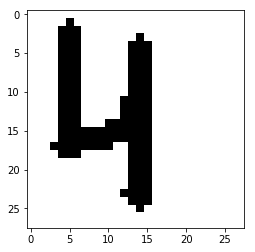

In [6]:
item = 2

matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')
correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]
outputs = n.query(inputs)
print (outputs)
label = numpy.argmax(outputs)
print("network says ", label)
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass